# 1. Data Analysis of the Influencers:
# 2. Sentiment Analysis of the Influencers: 


In [8]:
# Import the Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time


In [9]:
# Import keys from the config file
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [10]:
# # Twitter API Keys
# consumer_key = 'Your Key'
# consumer_secret = 'Your Key'
# access_token = 'Your Key'
# access_token_secret = 'Your Key'

In [11]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [12]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [13]:
# Target Search Term of the various Influencers
# Influencers = get the Influencers from the csv / xls file 

Influencers = ('@Oprah','@KimKardashian','@realDonaldTrump','@justinbieber','@KylieJenner')

# Array to hold the sentiments
Tweet_array = []
Sentiment_array = []

In [14]:
# Extract the first 100 tweets of the Influencers
print("-----------Start extraction of the tweets posted by the Influencers!!!-----------")

for user in Influencers:
    # Set the tweet count to 100
    tweet_count = 100
    print("Extracting tweets from %s"%user)
    
    # Extract tweets up to 5 pages
    for x in range(5):
        influencer_tweets = api.user_timeline(user,page = x)
# influencer_tweets        
        
        # For each tweet in a bunch of public tweets
        for tweet in influencer_tweets:
            
            #Calculate the compound, positive, negative and neutral values of each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            
            # Save the Tweets in an array as a dictionery item 
            Sentiment_array.append({"Influencers" : user,
                                    "Tweet Text" : tweet["text"],
                                    "Compound" : compound,
                                    "Positive" : pos,
                                    "Negative" : neg,
                                    "Neutral" : neu,
                                    "Date" : tweet["created_at"],
                                    "Tweets Ago" : tweet_count
                                   })
            
            #Decrease count of tweet by 1 in the reverse order
            tweet_count -= 1

print("-----------End of Extraction of Tweets !!!-----------")


-----------Start extraction of the tweets posted by the Influencers!!!-----------
Extracting tweets from @Oprah
Extracting tweets from @KimKardashian
Extracting tweets from @realDonaldTrump
Extracting tweets from @justinbieber
Extracting tweets from @KylieJenner
-----------End of Extraction of Tweets !!!-----------


In [15]:
# Create dataframe from the Dictionery item of the Sentiment Array
Sentiment_DF = pd.DataFrame.from_dict(Sentiment_array)

# Remove the '@' from the 'influence' column in the data frame
Sentiment_DF["Influencers"] = Sentiment_DF["Influencers"].map(lambda x: x.lstrip('@'))

# Re_arrang the columns and save into a CSV file
Sentiment_DF = Sentiment_DF[["Influencers", "Date", "Tweet Text"
                             , "Compound", "Positive", "Negative"
                             , "Neutral", "Tweets Ago"
                            ]]

# Store output in a .CSV File
Sentiment_DF.to_csv("influencer_tweets_Analysis.csv")

Sentiment_DF

,Influencers,Date,Tweet Text,Compound,Positive,Negative,Neutral,Tweets Ago
0,Oprah,Wed Jun 27 02:48:30 +0000 2018,@AshBenton @OWNTV Nope.. not happening. Days a...,0.0000,0.000,0.000,1.000,100
1,Oprah,Wed Jun 27 02:45:34 +0000 2018,@MawuliChai @chillwillbey @LoveIsOWN @OWNTV So...,0.5009,0.316,0.000,0.684,99
2,Oprah,Wed Jun 27 02:13:44 +0000 2018,@LoveIsOWN Thank’s y’all. Here’s to Besties🍷🍷🍷...,0.0000,0.000,0.000,1.000,98
3,Oprah,Wed Jun 27 02:11:51 +0000 2018,@AshBenton @OWNTV @MaraBrockAkil @thesalimakil...,0.3595,0.142,0.000,0.858,97
4,Oprah,Wed Jun 27 02:09:23 +0000 2018,RT @LoveIsOWN: #LOVEis the permission to desig...,0.6696,0.170,0.000,0.830,96
5,Oprah,Wed Jun 27 02:05:31 +0000 2018,@3LWTV @OWNTV Love that. #Lovetribe what part ...,0.6369,0.276,0.000,0.724,95
6,Oprah,Wed Jun 27 02:04:30 +0000 2018,@RichOnOWN I remember by hairdo’s . #LOVEis,0.0000,0.000,0.000,1.000,94
7,Oprah,Wed Jun 27 02:02:45 +0000 2018,#LOVEis happening now on @OWNTV,0.0000,0.000,0.000,1.000,93
8,Oprah,Tue Jun 26 21:37:46 +0000 2018,TONIGHT! 10/9c on OWN. See ya there! 👋🏾 #LOVEi...,0.5837,0.225,0.000,0.775,92
9,Oprah,Sat Jun 23 17:44:46 +0000 2018,Maria has been my friend since we were both yo...,0.7650,0.239,0.000,0.761,91


In [35]:
# Create an array of Influencers Houses with the unique function in the data frame
Influencers_array = Sentiment_DF["Influencers"].unique()
Influencers_array

# # #Plotting the graph for each influencer
# for influencer in Influencers_array:
# # Creating a temporary data frame to store for only one influencer at a time
#         Temp_DF = Sentiment_DF[Sentiment_DF["influencer"] == influencer]
        
#         Sentiment_DF['influencer'] = Sentiment_DF['influencer'].map(lambda x: x.lstrip('@'))
# #Temp_DF
    
#         plt.scatter(Temp_DF["Tweets Ago"],Temp_DF["Compound"]
#                  , marker = "o", linewidth = 0, alpha = 0.8, label = Influencers
#                  , facecolors = Temp_DF.influencer.map({"@Oprah": "blue"
#                                                    , "@KimKardashian" : "lime"
#                                                    , "@realDonaldTrump": 'indigo'
#                                                    , "@justinbieber":"fuchsia"
#                                                    , "@KylieJenner":"gold"
#                                                   })
#                 )

# # # Set the legend 
# plt.legend(bbox_to_anchor = (1,1), title="The Influencers", loc='best')

# # # Set the labels of x_axis, y_axis & title 
# plt.xlabel("Tweets Ago", fontsize=12)
# plt.ylabel("Tweet Polarity", fontsize=12)
# plt.title("Sentiment Analysis of The Influencers Tweets (%s)" % (time.strftime("%x")), fontsize=16)

# # #Set the limite of  x_axis and y_axis
# plt.xlim(0, 101)
# plt.ylim(-1,1)

# # # Set the grid
# plt.grid(True)

# filePath = 'Images'
# if not path.exists(filePath):
#     makedirs(filePath)

# # Save the result to a .png file
# plt.savefig("Sentiment Analysis of Influencers Tweets.png",bbox_inches='tight')
# # plt.savefig("Sentiment Analysis of The influencer's Tweets.png",bbox_inches='tight')

# plt.show()

array(['Oprah', 'KimKardashian', 'realDonaldTrump', 'justinbieber',
       'KylieJenner'], dtype=object)

In [17]:
# Calculate the mean for each Influencers & store into a dataframe
Influencers_Comp_Mean = Sentiment_DF.groupby("Influencers").mean()["Compound"].to_frame()

#Reset the index 
Influencers_Comp_Mean.reset_index(inplace=True)

Influencers_Comp_Mean

,Influencers,Compound
0,KimKardashian,0.329949
1,KylieJenner,0.385680
2,Oprah,0.318620
3,justinbieber,0.226935
4,realDonaldTrump,0.239621


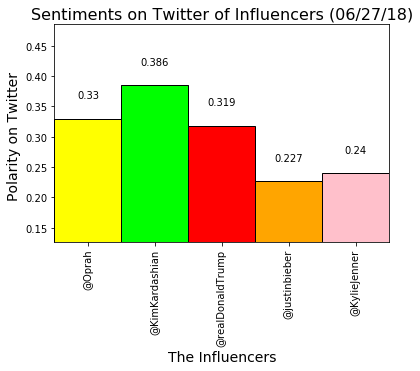

In [32]:
# Set the values for x_axis & y_axis
x_axis = Influencers_Comp_Mean.index.values
y_axis = Influencers_Comp_Mean["Compound"]
X_Label = ["@Oprah","@KimKardashian","@realDonaldTrump","@justinbieber","@KylieJenner"]

# Intialize the plots. 
fig,ax = plt.subplots()#  function that returns a tuple containing a figure and axes object(s)

#Set the plot and assign the values like colors etc
bars = ax.bar(x_axis,y_axis
              , align = "edge"
              , width = 1
              , linewidth = 1
              , edgecolor = 'black'
              , color = ["yellow","lime","red","orange","pink"]
             )

# Set the tick(s) of the bar graph
tick_locations = [value + 0.5 for value in range(len(x_axis))]
plt.xticks(tick_locations,X_Label,rotation='vertical')

# If value is positive then put True in the Summary else place False
Influencers_Comp_Mean["Positive"] = Influencers_Comp_Mean["Compound"] > 0

# Assign the height based on positive value after allocating True / false value
height = Influencers_Comp_Mean.Positive.map({True: 0.03 , False: -0.03})

# # Set the value on labels on the bars
for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + height[bars.index(bar)]
            , round(Influencers_Comp_Mean["Compound"][bars.index(bar)],3)
            , ha = 'center'
            , va = 'bottom'
            )

# Set the x_axis limits
ax.set_xlim(0, len(x_axis))

# Dynamically set the y_axis limits by finding the max & min value of y-axis
ax.set_ylim(min(y_axis)-0.1, max(y_axis) + 0.1)

# Set a horizontal line at y = 0
plt.hlines(0,0,len(x_axis))

# Title of the graph
ax.set_title("Sentiments on Twitter of Influencers (%s)" % (time.strftime("%x")), fontsize=16)

# Setting the y_axis label
ax.set_ylabel("Polarity on Twitter ", fontsize=14)

# # Setting the x_axis label
ax.set_xlabel("The Influencers", fontsize=14)
  
# Saving the graph
plt.savefig("The Influencer Twitter Sentiment .png",bbox_inches='tight')
plt.show()